In [5]:
from sklearn.datasets import load_digits

digits = load_digits()

In [6]:
digits.data.shape

(1797, 64)

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

In [8]:
clusters

array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

In [9]:
# 10 个聚类中心，每个 64 维
kmeans.cluster_centers_.shape

(10, 64)

把 10 个聚类中心打出来看一下。

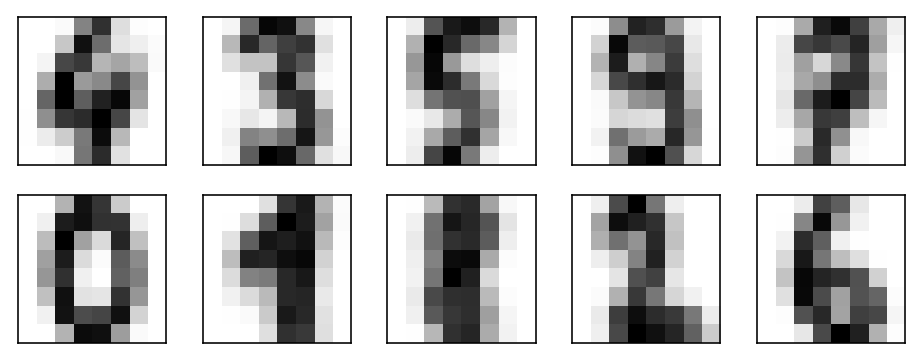

In [12]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

In [13]:
clusters

array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

In [15]:
import numpy as np

labels = np.zeros_like(clusters)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [18]:
mask = (clusters == 1)
mask

array([False, False, False, ..., False, False, False])

In [19]:
labels[mask]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [20]:
mask = (clusters == 2)
mask

array([False, False, False, ..., False, False, False])

In [21]:
labels[mask]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [23]:
from scipy.stats import mode

In [27]:
digits.target[mask]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 5, 5, 5, 8, 5, 1, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5, 5, 5, 9, 9, 5, 5,
       5, 5, 5, 5, 5, 9, 9, 5, 5, 3, 5, 5, 5, 5, 5, 3, 5])

In [28]:
from collections import Counter

Counter(digits.target[mask])

Counter({1: 1, 3: 2, 5: 136, 8: 4, 9: 6})

In [29]:
mode(digits.target[mask])

ModeResult(mode=array([5]), count=array([136]))

In [30]:
from scipy.stats import mode

for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.7935447968836951

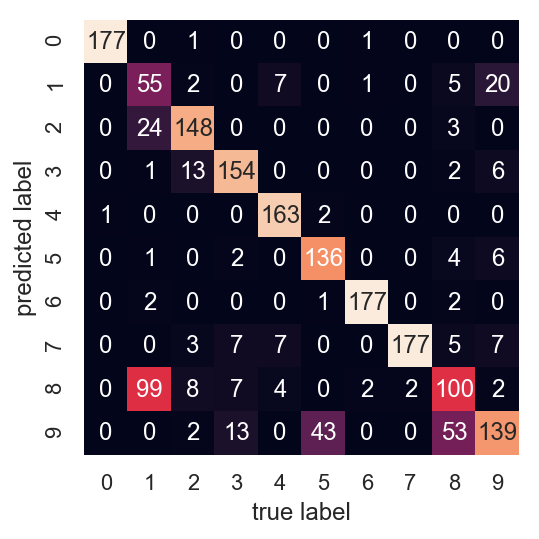

In [34]:
import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)
sns.heatmap(
    mat.T,
    square=True,
    annot=True,
    fmt='d',
    cbar=False,
    xticklabels=digits.target_names,
    yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## t- 分布邻域嵌入算法

在执行 k-means 之前对数据进行预处理。 t-SNE 是一个非线性嵌入算法，特别擅长保留簇中的数据点。

In [36]:
%%time
from sklearn.manifold import TSNE

# 投影数据：这一步将耽误几秒钟
# 可以理解为降维
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

CPU times: user 12 s, sys: 649 ms, total: 12.6 s
Wall time: 12.7 s


In [37]:
# 计算了聚类中心
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

In [38]:
# 排列标签
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [39]:
# 计算准确度
accuracy_score(digits.target, labels)

0.9326655537006121